In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('E:\\clarity.ai\\loan-prediction\\EDA\\loan-train-data.csv')

In [3]:
data.shape

(614, 13)

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
data['Credit_History'] = data['Credit_History'].astype('O')

In [10]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [12]:
data['ApplicantIncome'] = data['ApplicantIncome'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


In [14]:
data.shape

(614, 13)

In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


### Target Feature

In [16]:
print(f"Target feature : 'Loan_Status'")

Target feature : 'Loan_Status'


In [17]:
print(f"Unique values in target feature :{data['Loan_Status'].unique()}")
print(f"Unique values count in target feature :{len(data['Loan_Status'].unique())}")
print(f"Unique values count in target feature :({data['Loan_Status'].nunique()})")

Unique values in target feature :['Y' 'N']
Unique values count in target feature :2
Unique values count in target feature :(2)


In [19]:
# Observation :
#     1. Its a binary classification business statement
#     2. Its in categorical form, need to transofrm

### Step 1 : Summary Statistics

In [20]:
summary_stats = data[numerical_columns].describe()
print(summary_stats)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       614.000000         614.000000  592.000000         600.00000
mean       5403.459283        1621.245798  146.412162         342.00000
std        6109.041673        2926.248369   85.587325          65.12041
min         150.000000           0.000000    9.000000          12.00000
25%        2877.500000           0.000000  100.000000         360.00000
50%        3812.500000        1188.500000  128.000000         360.00000
75%        5795.000000        2297.250000  168.000000         360.00000
max       81000.000000       41667.000000  700.000000         480.00000


### count shows that LoanAmount  and Loan_Amount_Term may have null values
### min value for CoapplicantIncome  is zero which is not possible, 273 rows has min value zero

In [21]:
data[data['CoapplicantIncome']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596.0,0.0,100.0,240.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,LP002959,Female,Yes,1,Graduate,No,12000.0,0.0,496.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
summary_stats1 = data[categorical_columns].describe()
print(summary_stats1)

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

        Credit_History Property_Area Loan_Status  
count            564.0           614         614  
unique             2.0             3           2  
top                1.0     Semiurban           Y  
freq             475.0           233         422  


### count shows that Gender, Married, Dependents, Education, Self_Employed, Credit_History may have null values

### Step - 2  : Data Visualization

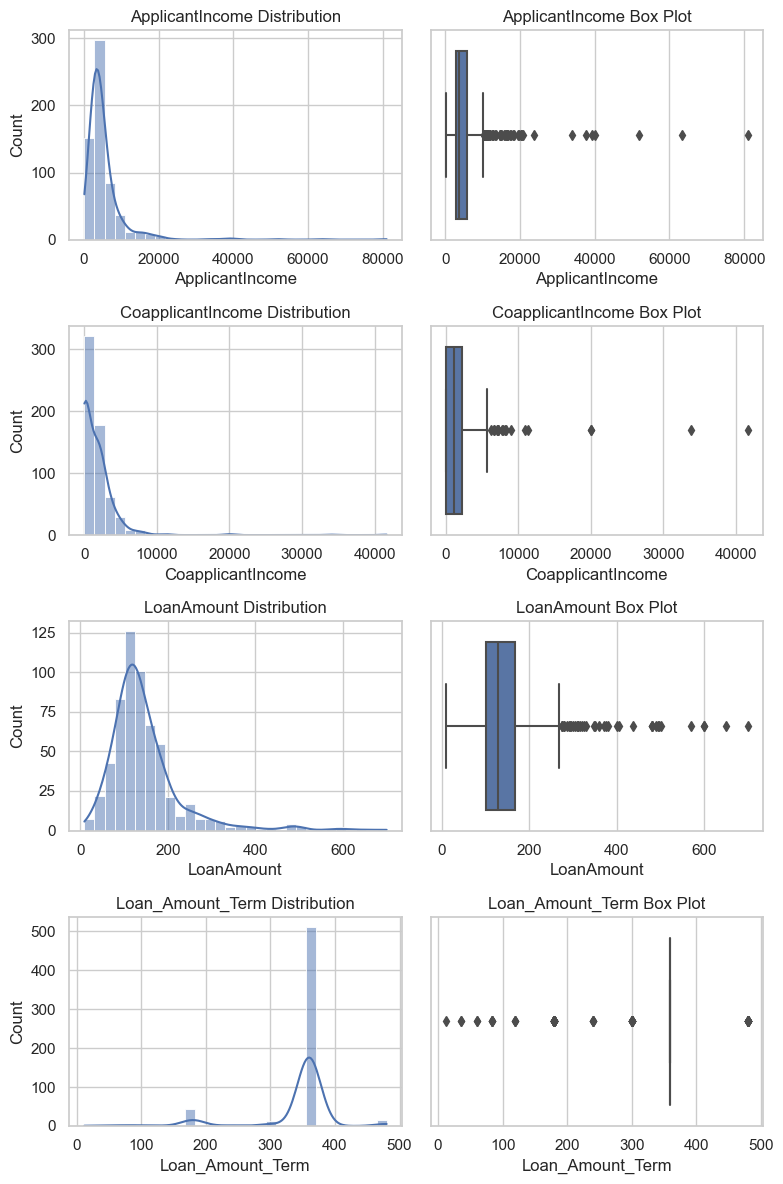

In [23]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(8,3*len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'{col} Distribution')
    
    sns.boxplot(x=col, data=data, ax=axes[i,1])
    axes[i,1].set_title(f'{col} Box Plot')
    
plt.tight_layout()

plt.show()

### Step 3 : Correlation Analysis

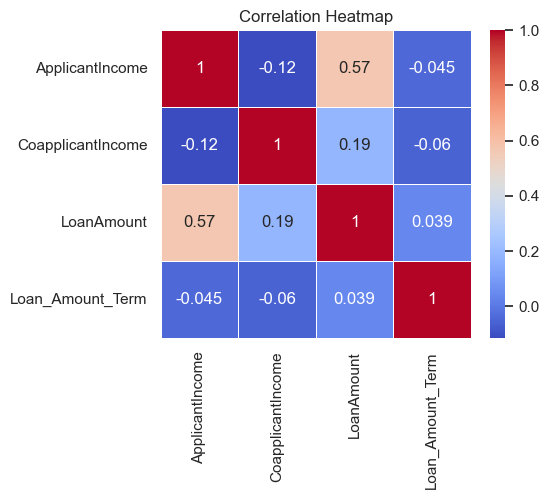

In [24]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(5,4))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)

plt.title('Correlation Heatmap')

plt.show()